In [1]:
import numpy as np
import tensorflow as tf

import keras
import keras.backend as K
from keras.optimizers import SGD, Adam, Adagrad, RMSprop
from keras.applications import *
from keras.preprocessing import *
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation, BatchNormalization, Dropout
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import glob
from PIL import Image
import os
from os import listdir

Using TensorFlow backend.


In [2]:
dirName = 'C:/Users/Admin/Desktop/NT/project/augumented data'
folders=listdir(dirName)

def getListOfFiles (dirName):
  listOfFile = os.listdir(dirName)
  allFiles=list() 
  for fol_name in listOfFile:
    fullPath = os.path.join(dirName, fol_name)
    allFiles.append(fullPath)
  return allFiles

In [3]:
Folders = getListOfFiles(dirName)
len(Folders)
subfolders = []
for num in range(len(Folders)):
  sub_fols = getListOfFiles (Folders[num])
  subfolders+=sub_fols
subfolders

['C:/Users/Admin/Desktop/NT/project/augumented data\\Bird\\GIB_AUG',
 'C:/Users/Admin/Desktop/NT/project/augumented data\\Bird\\SPS_AUG',
 'C:/Users/Admin/Desktop/NT/project/augumented data\\Flowers\\Corpse_AUG',
 'C:/Users/Admin/Desktop/NT/project/augumented data\\Flowers\\LS_Orchid_AUG',
 'C:/Users/Admin/Desktop/NT/project/augumented data\\Mammal\\Pangolin_AUG',
 'C:/Users/Admin/Desktop/NT/project/augumented data\\Mammal\\SW_Deer_AUG']

In [4]:
X_data = []
Y_data = []
id_no=0

found = []

for paths in subfolders:
  files=glob.glob (paths + "/*.jpg")
  found.append((paths.split('\\')[-2], paths.split('\\')[-1]))


  for myFile in files:
    img=Image.open(myFile)
    
    img=img.resize((224,224), Image. ANTIALIAS)
    img= np.array(img)
    if img.shape == ( 224, 224, 3):
      X_data.append (img)
      Y_data.append (id_no)
  id_no+=1

In [5]:
X = np.array(X_data)
Y = np.array(Y_data)
print("x-shape", X. shape, "y shape", Y.shape)
X = X.astype('float32')/255.0
y_cat = to_categorical(Y_data, len (subfolders))
X_train, X_test, y_train, y_test = train_test_split (X, y_cat, test_size=0.2)
print("The model has " + str(len(X_train)) + " inputs")

x-shape (1251, 224, 224, 3) y shape (1251,)
The model has 1000 inputs


In [6]:
early_stop_loss = EarlyStopping(monitor='loss', patience=3, verbose=1)
early_stop_val_acc = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1)
model_callbacks=[early_stop_loss, early_stop_val_acc]

In [7]:
from keras.models import Sequential

In [8]:
def load_CNN(output_size):
    K.clear_session()
    model = Sequential()
    model.add(Dropout(0.4,input_shape=(224,224,3)))
    
    model.add(Conv2D(256,(5,5), input_shape=(224,224,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    
    model.add(Conv2D(128,(3,3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    
    model.add(Conv2D(64,(3,3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(output_size, activation='softmax'))
    
    return model

In [9]:
model = load_CNN(6)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
model.summary()
weights = model.get_weights()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 256)     19456     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 256)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 128)     295040    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 64)        73792     
____________________

In [10]:
histories_acc=[]
histories_val_acc=[]
histories_loss=[]
histories_val_loss=[]

model.set_weights(weights)
h=model.fit(X_train, y_train, batch_size=16, epochs=7, verbose=1, callbacks=[early_stop_loss], shuffle=True, validation_data=(X_test,y_test))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1000 samples, validate on 251 samples
Epoch 1/7
1000/1000 [==============================] - 1330s 1s/step - loss: 1.8094 - acc: 0.1780 - val_loss: 1.6937 - val_acc: 0.2032
Epoch 2/7
1000/1000 [==============================] - 1146s 1s/step - loss: 1.7904 - acc: 0.2040 - val_loss: 1.7410 - val_acc: 0.2988
Epoch 3/7
1000/1000 [==============================] - 1130s 1s/step - loss: 1.7048 - acc: 0.2570 - val_loss: 1.5008 - val_acc: 0.3386
Epoch 4/7
1000/1000 [==============================] - 1173s 1s/step - loss: 1.4638 - acc: 0.3960 - val_loss: 1.3358 - val_acc: 0.3904
Epoch 5/7
1000/1000 [==============================] - 1138s 1s/step - loss: 1.1645 - acc: 0.5400 - val_loss: 1.2539 - val_acc: 0.4861
Epoch 6/7
1000/1000 [==============================] - 1116s 1s/step - loss: 0.9156 - acc: 0.6740 - val_loss: 1.1207 - val_acc: 0.5657
Epoch 7/7
1000/1000 [============================

In [11]:
histories_acc.append(h.history['acc'])
histories_val_acc.append(h.history['val_acc'])
histories_loss.append(h.history['loss'])
histories_val_loss.append(h.history['val_loss'])

histories_acc = np.array(histories_acc)
histories_val_acc = np.array(histories_val_acc)
histories_loss = np.array(histories_loss)
histories_val_loss = np.array(histories_val_loss)

print('histories_acc',histories_acc,'histories_val_acc',histories_val_acc,'histories_loss',histories_loss,'histories_val_loss',histories_val_loss)

histories_acc [[0.178 0.204 0.257 0.396 0.54  0.674 0.808]] histories_val_acc [[0.20318725 0.29880478 0.33864542 0.39043825 0.48605578 0.56573705
  0.52589642]] histories_loss [[1.80939502 1.7904308  1.70479077 1.4638305  1.16453962 0.91564793
  0.56064246]] histories_val_loss [[1.69365017 1.74097691 1.50081554 1.3357921  1.25388762 1.12073512
  1.35069323]]


In [20]:
prediction = model.predict_proba([X_test[image_number].reshape(1,224,224,3)])

for idx, result, x in zip(range(0,6), found, prediction[0]):
    print("Label: {}, Type: {}, Species: {}, Score: {}%".format(idx, result[0],result[1],round(x*100,3)))
    
ClassIndex = model.predict_classes([X_test[image_number].reshape(1,224,224,3)])

ClassIndex

print(found[ClassIndex[0]])

Label: 0, Type: Bird, Species: GIB_AUG, Score: 0.589%
Label: 1, Type: Bird, Species: SPS_AUG, Score: 0.013%
Label: 2, Type: Flowers, Species: Corpse_AUG, Score: 1.036%
Label: 3, Type: Flowers, Species: LS_Orchid_AUG, Score: 4.166%
Label: 4, Type: Mammal, Species: Pangolin_AUG, Score: 19.055%
Label: 5, Type: Mammal, Species: SW_Deer_AUG, Score: 75.142%
('Mammal', 'SW_Deer_AUG')


148


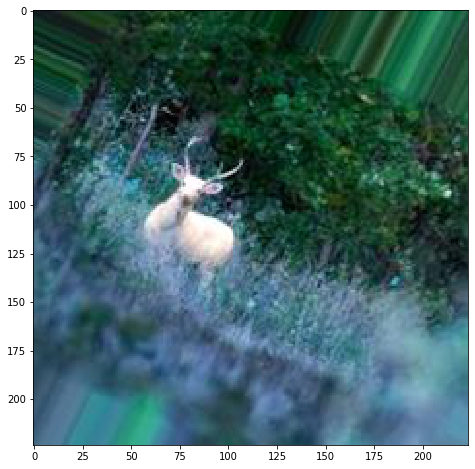

In [19]:
image_number = np.random.randint(0,len(X_test))
print(image_number)

plt.figure(figsize=(8,8))
plt.imshow(X_test[image_number])

In [21]:
model_json = model.to_json()
with open("final_model.json","w")as json_file:
    json_file.write(model_json)
    
model.save_weights("final_model.h5")
print("saved model to disk")

saved model to disk
